hello world


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
key="4a600cf6a9ce2e5e5237ea092141f6c248ceb61c"

In [137]:
df = pdr.get_data_tiingo('MSFT', api_key=key)

C:\Users\JAINAM\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [138]:
df.to_csv('MSFT.csv')

In [139]:
df=pd.read_csv('MSFT.csv')

In [140]:
df


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2017-05-02 00:00:00+00:00,69.30,69.7100,69.1300,69.710,23000828,64.688093,65.070807,64.529406,65.070807,23000828,0.0,1.0
1,MSFT,2017-05-03 00:00:00+00:00,69.08,69.3800,68.7100,69.380,28725646,64.482734,64.762769,64.137357,64.762769,28725646,0.0,1.0
2,MSFT,2017-05-04 00:00:00+00:00,68.81,69.0800,68.6400,69.030,21421413,64.230702,64.482734,64.072016,64.436061,21421413,0.0,1.0
3,MSFT,2017-05-05 00:00:00+00:00,69.00,69.0300,68.4850,68.900,18882845,64.408058,64.436061,63.927331,64.314713,18882845,0.0,1.0
4,MSFT,2017-05-08 00:00:00+00:00,68.94,69.0500,68.4200,68.970,18446053,64.352051,64.454730,63.866657,64.380054,18446053,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,MSFT,2022-04-25 00:00:00+00:00,280.72,281.1100,270.7700,273.290,35678852,280.720000,281.110000,270.770000,273.290000,35678852,0.0,1.0
1255,MSFT,2022-04-26 00:00:00+00:00,270.22,278.3599,270.0000,277.500,42047008,270.220000,278.359900,270.000000,277.500000,42047008,0.0,1.0
1256,MSFT,2022-04-27 00:00:00+00:00,283.22,290.9700,279.1600,282.100,63477694,283.220000,290.970000,279.160000,282.100000,63477694,0.0,1.0
1257,MSFT,2022-04-28 00:00:00+00:00,289.63,290.9800,281.4562,285.185,33646570,289.630000,290.980000,281.456200,285.185000,33646570,0.0,1.0


In [141]:
df1=df.reset_index()['close']

In [142]:
df1

0        69.30
1        69.08
2        68.81
3        69.00
4        68.94
         ...  
1254    280.72
1255    270.22
1256    283.22
1257    289.63
1258    277.52
Name: close, Length: 1259, dtype: float64

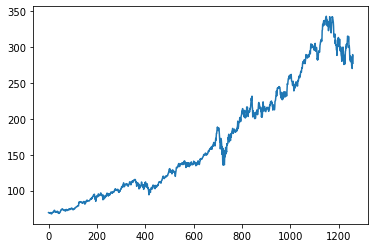

In [143]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [144]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np

In [145]:
df1

0        69.30
1        69.08
2        68.81
3        69.00
4        68.94
         ...  
1254    280.72
1255    270.22
1256    283.22
1257    289.63
1258    277.52
Name: close, Length: 1259, dtype: float64

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [147]:
print(df1)

[[0.00660305]
 [0.00580488]
 [0.00482531]
 ...
 [0.78271596]
 [0.80597177]
 [0.76203606]]


In [148]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [149]:
training_size,test_size

(818, 441)

In [150]:
train_data

array([[0.00660305],
       [0.00580488],
       [0.00482531],
       [0.00551464],
       [0.00529696],
       [0.00565976],
       [0.00663934],
       [0.00355549],
       [0.00326525],
       [0.00344665],
       [0.00700214],
       [0.        ],
       [0.00083445],
       [0.00076189],
       [0.00351921],
       [0.00435366],
       [0.00468019],
       [0.00776403],
       [0.00899757],
       [0.01063019],
       [0.0085622 ],
       [0.0095055 ],
       [0.01552806],
       [0.01741465],
       [0.01828538],
       [0.01781374],
       [0.01621739],
       [0.01030367],
       [0.00834452],
       [0.01150093],
       [0.01012227],
       [0.00877989],
       [0.00914269],
       [0.0122991 ],
       [0.00881617],
       [0.01012227],
       [0.01008598],
       [0.01353263],
       [0.01106556],
       [0.00627653],
       [0.00841708],
       [0.00366433],
       [0.00526068],
       [0.00250336],
       [0.00580488],
       [0.00395458],
       [0.00718354],
       [0.009

In [151]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [152]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [153]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [154]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [155]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [156]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [157]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [158]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 223ms/step - loss: 0.0139 - val_loss: 0.1079
Epoch 2/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0032 - val_loss: 0.0072
Epoch 3/100
12/12 [==============================] - 2s 134ms/step - loss: 9.5301e-04 - val_loss: 0.0051
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 7.3362e-04 - val_loss: 0.0023
Epoch 5/100
12/12 [==============================] - 2s 136ms/step - loss: 5.6475e-04 - val_loss: 0.0026
Epoch 6/100
12/12 [==============================] - 2s 145ms/step - loss: 5.2006e-04 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 2s 139ms/step - loss: 5.3031e-04 - val_loss: 0.0029
Epoch 8/100
12/12 [==============================] - 2s 138ms/step - loss: 5.1797e-04 - val_loss: 0.0023
Epoch 9/100
12/12 [==============================] - 2s 135ms/step - loss: 5.0152e-04 - val_loss: 0.0019
Epoch 10/100
12/12 [==============================] - 2s 136ms/

12/12 [==============================] - 2s 133ms/step - loss: 2.2309e-04 - val_loss: 0.0023
Epoch 79/100
12/12 [==============================] - 2s 133ms/step - loss: 2.3445e-04 - val_loss: 0.0048
Epoch 80/100
12/12 [==============================] - 2s 133ms/step - loss: 2.0457e-04 - val_loss: 0.0016
Epoch 81/100
12/12 [==============================] - 2s 132ms/step - loss: 1.8359e-04 - val_loss: 0.0039
Epoch 82/100
12/12 [==============================] - 2s 134ms/step - loss: 1.8158e-04 - val_loss: 0.0012
Epoch 83/100
12/12 [==============================] - 2s 139ms/step - loss: 2.1739e-04 - val_loss: 0.0066
Epoch 84/100
12/12 [==============================] - 2s 142ms/step - loss: 1.9844e-04 - val_loss: 0.0041
Epoch 85/100
12/12 [==============================] - 2s 133ms/step - loss: 2.0755e-04 - val_loss: 0.0032
Epoch 86/100
12/12 [==============================] - 2s 132ms/step - loss: 2.5401e-04 - val_loss: 0.0030
Epoch 87/100
12/12 [==============================] - 2s 13

In [237]:
model.save("saved_lstm_model_for.h5")

In [161]:
import tensorflow as tf

In [162]:
tf.__version__

'2.8.0'

In [163]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [164]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [165]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

130.2992864568131

In [166]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

268.21834296257816

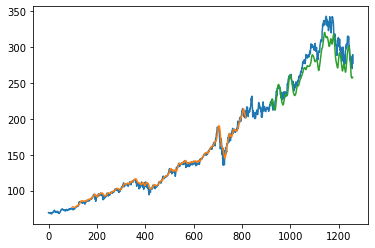

In [167]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [168]:
len(test_data)

441

In [206]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [207]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [208]:
temp_input

[0.9702862533105976,
 0.970467655915539,
 0.9636831984907304,
 0.997932010303668,
 0.9865399267133474,
 0.9464136705003083,
 0.9693066792439138,
 0.9339331712803394,
 0.9299423139716287,
 0.9158291913071872,
 0.9426042157965389,
 0.9640460037006131,
 0.969451801327867,
 0.9976054856147734,
 0.9932518230961795,
 0.9957914595653592,
 0.9862496825454412,
 0.9753655262489569,
 0.9696694844537967,
 0.9488444654065231,
 0.9030221673983239,
 0.8939520371512535,
 0.894532525487066,
 0.8953669774697963,
 0.8979428944599646,
 0.909879185865109,
 0.8610093240938941,
 0.8806008054275658,
 0.8532090120814133,
 0.8556760875086165,
 0.849399557377644,
 0.829191307187171,
 0.8304248449007727,
 0.8018357943620071,
 0.8316583826143742,
 0.8430141856837063,
 0.8735623843558393,
 0.8834306860646519,
 0.8753764104052533,
 0.8924282552697456,
 0.848129739143054,
 0.8651453034865579,
 0.8470413235134056,
 0.8601385915901751,
 0.8842651380473823,
 0.85222943801473,
 0.8255995356093313,
 0.8254544135253783,
 0

In [291]:
# demonstrate prediction for next 20 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<20):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.63062006 0.60546815 0.57921672 0.55217189 0.52467769 0.49709797
 0.4697893  0.44306782 0.41718307 0.39231241 0.3685872  0.34615043
 0.32522538 0.30615848 0.28940415 0.27544734 0.2646952  0.25739136
 0.25358549 0.25316045 0.25589135 0.26150689 0.26973557 0.28033006
 0.29307449 0.30778044 0.3242785  0.34241009 0.36201987 0.38295403
 0.40505984 0.42818698 0.45218834 0.476919   0.50223076 0.5279628
 0.55392963 0.57990986 0.60563737 0.63080007 0.65504968 0.67802042
 0.69935578 0.71873778 0.73590636 0.75067288 0.76291567 0.77256763
 0.77960169 0.78401619 0.78582466 0.78505296 0.7817359  0.77591932
 0.76765883 0.75702006 0.74407983 0.72892445 0.71165216 0.69237673
 0.67123026 0.64837158 0.62399226 0.59832519 0.571648   0.54428262
 0.51658547 0.48892522 0.46165314 0.4350692  0.40939987 0.3848013
 0.36139649 0.33934107 0.31889021 0.30042776 0.28443071 0.27137598
 0.26163131 0.25538296 0.25262389 0.25319481 0.25684804 0.26330569
 0.27230036 0.2835933  0.29697746 0.31227127 0.32930

9 day output [[0.77558523]]
10 day input [0.3685872  0.34615043 0.32522538 0.30615848 0.28940415 0.27544734
 0.2646952  0.25739136 0.25358549 0.25316045 0.25589135 0.26150689
 0.26973557 0.28033006 0.29307449 0.30778044 0.3242785  0.34241009
 0.36201987 0.38295403 0.40505984 0.42818698 0.45218834 0.476919
 0.50223076 0.5279628  0.55392963 0.57990986 0.60563737 0.63080007
 0.65504968 0.67802042 0.69935578 0.71873778 0.73590636 0.75067288
 0.76291567 0.77256763 0.77960169 0.78401619 0.78582466 0.78505296
 0.7817359  0.77591932 0.76765883 0.75702006 0.74407983 0.72892445
 0.71165216 0.69237673 0.67123026 0.64837158 0.62399226 0.59832519
 0.571648   0.54428262 0.51658547 0.48892522 0.46165314 0.4350692
 0.40939987 0.3848013  0.36139649 0.33934107 0.31889021 0.30042776
 0.28443071 0.27137598 0.26163131 0.25538296 0.25262389 0.25319481
 0.25684804 0.26330569 0.27230036 0.2835933  0.29697746 0.31227127
 0.32930985 0.34793615 0.36799601 0.38933581 0.41180363 0.43524984
 0.45952833 0.48449412 0

19 day output [[0.7245729]]
[[0.613545835018158], [0.6385249495506287], [0.6624807715415955], [0.6850457191467285], [0.7058715224266052], [0.7246536016464233], [0.7411534786224365], [0.7552027106285095], [0.7666974663734436], [0.7755852341651917], [0.7818480134010315], [0.7854897975921631], [0.7865278720855713], [0.7849915027618408], [0.7809187769889832], [0.774358332157135], [0.7653690576553345], [0.7540205717086792], [0.7403920292854309], [0.7245728969573975]]


In [292]:
day_new=np.arange(1,101)
day_pred=np.arange(101,121)

In [260]:
import matplotlib.pyplot as plt

In [276]:
len(df1)

1259

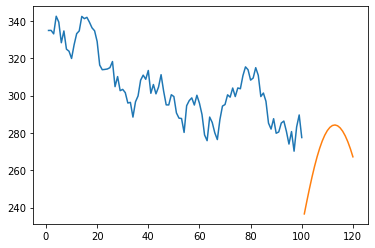

In [293]:
#df1 value is df1-100 in this 
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

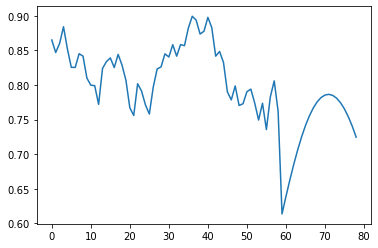

In [294]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [296]:
df3=scaler.inverse_transform(df3).tolist()

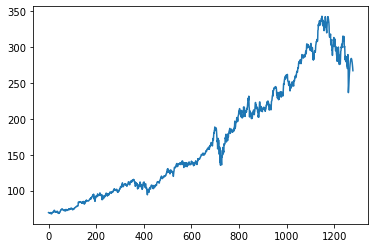

In [297]:
plt.plot(df3)